# Poisson Distribution

A Poisson Distribution gives the probability of an event happening based on an average occurrence of that event over a period of time or a large volume.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/1920px-Poisson_pmf.svg.png" width=400>

The formula for a poisson distribution is:

$$P(X;λ)=\frac{e^{−λ}λ^X}{X!}$$

- **lambda** is the mean occurrence of that event.
- **$e$** is a constant = 2.7183.

In [4]:
# Slide 23 Poisson Distribution

In [24]:
from scipy.stats import poisson
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import pandas as pd

## Question 1

Suppose a baseball player has a p=.300 batting average. What is the probability of:

- P(X<=150) hits in n=500 at bats
- P(X=150)
- P(X>150)

In [20]:
# P(X<=150)

mean = 0.3*500
sum(poisson.pmf((np.arange(0,151)),mean))
(poisson.cdf(150,mean))

0.5216971797074769

In [21]:
# P(X=150)

poisson.pmf(150,mean)

0.03255540945683085

In [14]:
# P(X>150)

poisson.sf(150,mean)

0.47830282029252313

## Question 2

What is the probability of making 2 to 4 sales in a week if the average sales rate is 3 per week?

In [3]:
(sum(poisson.pmf(np.arange(2,5),3)))

0.6161149710523164

## Question 3

Patients arrive at hospital accident and emergency department at random at a rate of 6 per hour

Find the probability that during any 90 minute period, the number of patients arriving at the hopistal accident and emergency department is:

- exactly 7
- at least 10

In [27]:
poisson.pmf(7,9)

0.1171161244529091

In [7]:
poisson.sf(9,9)

0.4125917556680583

## Question 4

What is the distribution of successes from a sample of n = 50 when the probability of success is p = 0.03 for both binomial and poisson distributions. Plot the barplot to visualize.

In [6]:
n = 50
p = 0.03
mean = n*p
mean

1.5

In [8]:
# For Binomial distribution
r_val = list(range(n + 1))

x = ([binom.pmf(r, n, p) for r in r_val])
x
print (len(x))
print (x)

print ('\n')

# For Poisson distribution
y = poisson.pmf(np.arange(0,51),mean)
print (len(y))
print (y)

51
[0.21806537534740758, 0.3372144979599111, 0.2555182020624037, 0.126441996896857, 0.045949282377467385, 0.0130742288001861, 0.0030326819381876315, 0.0005895640881307254, 9.800743217637195e-05, 1.4145402582156552e-05, 1.7936953789744704e-06, 2.0172769023143394e-07, 2.0276752368623346e-08, 1.8331084615567982e-09, 1.4983434405949713e-10, 1.1121724507509181e-11, 7.524362585621589e-13, 4.6542448983225306e-14, 2.63900483925509e-15, 1.3746308441046566e-16, 6.589725180501663e-18, 2.9115133345368597e-19, 1.186980600303195e-20, 4.469133591459889e-22, 1.5549820485749527e-23, 5.001591743869918e-25, 1.4873885043229258e-26, 4.089040561712573e-28, 1.0388210558106084e-29, 2.4373334405795292e-31, 5.27670126311022e-33, 1.0528835243984566e-34, 1.9334523482832563e-36, 3.261681562239733e-38, 5.043837467381117e-40, 7.131198775678653e-42, 9.189689143915715e-44, 1.0754163946627936e-45, 1.1378523980425176e-47, 1.082809577835894e-49, 9.209462904274144e-52, 6.947042673578793e-54, 4.604078355096428e-56, 2.64919

<AxesSubplot:>

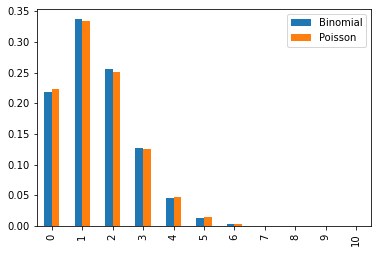

In [11]:
df = pd.DataFrame({'Binomial':x,'Poisson':y})
df

df[:11].plot(kind='bar')

## Question 5

Suppose the probability that a drug produces a certain side effect is p = 0.1% and n = 1,000 patients in a clinical trial receive the drug. What is the probability 0 people experience the side effect?

In [15]:
np = 0.001*1000
poisson.pmf(0,np)

0.36787944117144233

## Question 6

If there are twelve cars crossing a bridge per minute on average, find the probability of having eighteen or more cars crossing the bridge in a particular minute.

In [8]:
np = 12
poisson.sf(17,np)

0.06296629677397021

## Question 7

If a bird flies overhead at an average rate of 1 every 4 hours, what is the probability that at least one bird will fly overhead in the next hour?

In [12]:
np = 1/4
1 - poisson.cdf(1,np)

0.026499021160743874

## Question 8

A New York Times article in 2012 found that on average 24 horses die on US racetracks each week and from 2009 to 2012 and the US logged 5.2 incidents per 1,000 starts. Calculate the probability of getting 30 or more fatalities in one week.

In [17]:
x1 = 24

four_years_week =  4*52
starts_per_week = 1000 / four_years_week
probability = 5.2/1000
x2 = probability * starts_per_week
total_mean = x1 + x2

1-poisson.cdf(29, total_mean)

0.13326013538582204

## Question 9

Continuing from Question 8, calculate the probability that between 0 and 40 horses will die in a week. Plot a scatter plot to visualize it.

Text(0, 0.5, 'P(X)')

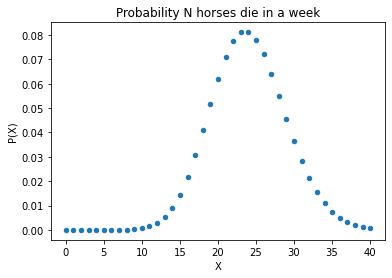

In [26]:
df = pd.DataFrame(poisson.pmf(np.arange(0,41), total_mean))
df.rename(columns = {0:'X'},inplace = True)

ax = df.reset_index().plot.scatter(x = 'index', y = 'X')
ax.set_title("Probability N horses die in a week")
ax.set_xlabel("X")
ax.set_ylabel("P(X)")

## Question 10

Based on probability of that 30 or more horses will die in one week, calculate the total number of times in a year that 30 or more horses will die in a year.

In [28]:
x1_year = 24*365/7
x2_year = 0.13326013538582204*365/7
x_year_total = x1_year + x2_year

1 - poisson.cdf(30, x_year_total)

1.0

In [32]:
print ( poisson.sf(29, total_mean) * 52 , 'times' )

6.929527040062746 times
